     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.2/434.2 MB 69.1 MB/s  0:00:05:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyspark: filename=pyspark-4.0.1-py2.py3-none-any.whl size=434813860 sha256=1ede1e626b966109c978f5cb6959ef59b7e8880a82a0bacd4e9315c93320090e
  Stored in directory: /Users/abhishekkalugade/Library/Caches/pip/wheels/00/e3/92/8594f4cee2c9fd4ad82fe85e4bf2559ab8ea84ef19b1dd3d15
Successfully built pyspark
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pyspark]m1/2 [pyspark]


25/11/10 22:53:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


Total rows: 7043
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------------+------------+-----+
|customerid|gender|seniorcitizen|partner|dependents|tenure|phoneservice|   multiplelines|internetservice|onlinesecurity|onlinebackup|deviceprotection|techsupport|streamingtv|streamingmovies|      contract|paperlessbilling|       paymentmethod|      monthlycharges|totalcharges|churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Ye

25/11/10 22:53:18 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+----------+------+-------------------+-------+----------+-----------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------------+------------------+-----+
|summary|customerid|gender|      seniorcitizen|partner|dependents|           tenure|phoneservice|multiplelines|internetservice|onlinesecurity|onlinebackup|deviceprotection|techsupport|streamingtv|streamingmovies|      contract|paperlessbilling|       paymentmethod|      monthlycharges|      totalcharges|churn|
+-------+----------+------+-------------------+-------+----------+-----------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------------+------------------+-----+
|  count|      7043|  7043|               7043|   7043|      704

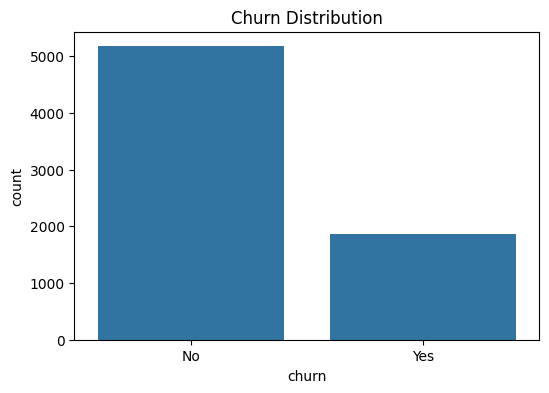

churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


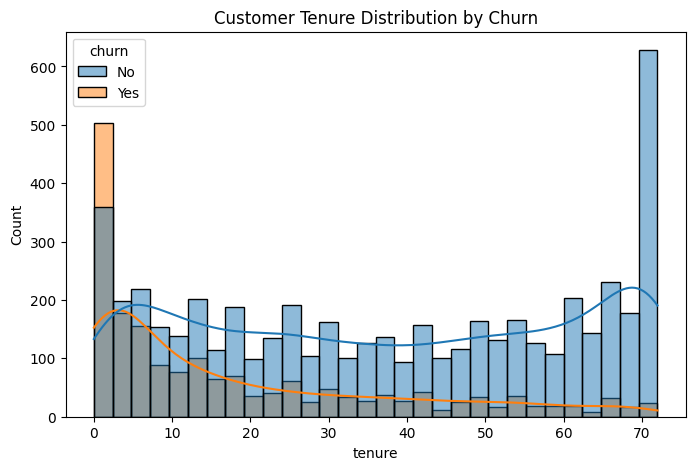

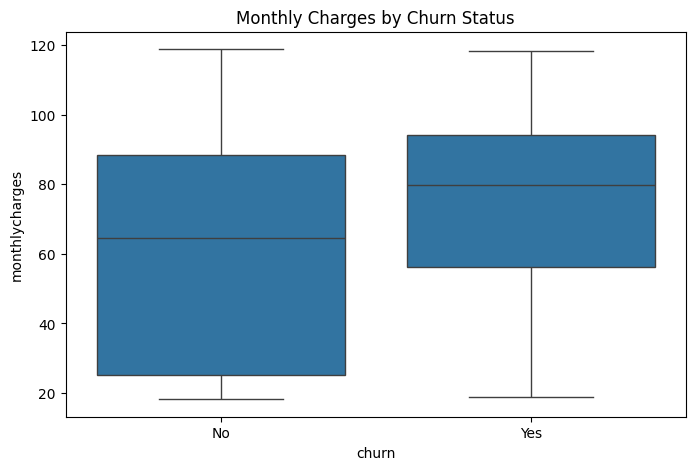

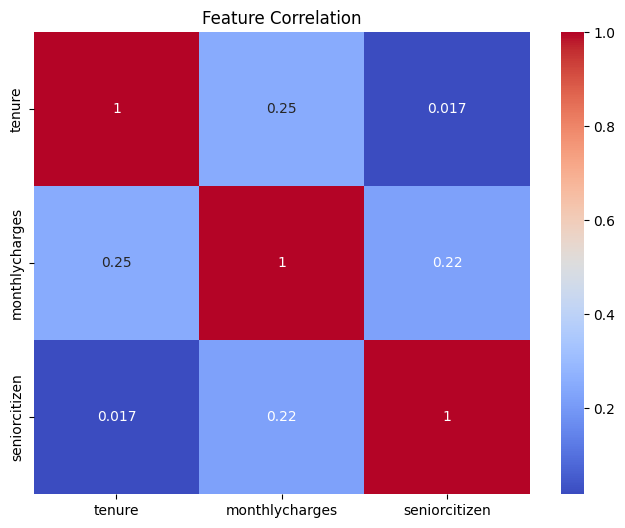

In [ ]:
!pip install pyspark psycopg2-binary pandas matplotlib seaborn

from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

spark = SparkSession.builder \
    .appName("ChurnGuard-EDA") \
    .config("spark.jars", "/Users/abhishekkalugade/Programming/My_Projects/ChurnGuard Project_Customer_Churn_Prediction/postgresql-42.7.8.jar") \
    .getOrCreate()

jdbc_url = "jdbc:postgresql://localhost:5432/churn_db"
connection_properties = {
    "user": "churnuser",
    "password": "churnpass",
    "driver": "org.postgresql.Driver"
}

df = spark.read.jdbc(
    url=jdbc_url,
    table="customers",
    properties=connection_properties
)

print(f"Total rows: {df.count()}")
df.show(5)

df.printSchema()
df.describe().show()

from pyspark.sql.functions import col, sum as spark_sum

missing_counts = df.select([
    spark_sum(col(c).isNull().cast("int")).alias(c) 
    for c in df.columns
])
missing_counts.show()

df_pandas = df.toPandas()

plt.figure(figsize=(6,4))
sns.countplot(data=df_pandas, x='churn')
plt.title('Churn Distribution')
plt.show()

print(df_pandas['churn'].value_counts(normalize=True))

plt.figure(figsize=(8,5))
sns.histplot(data=df_pandas, x='tenure', hue='churn', kde=True, bins=30)
plt.title('Customer Tenure Distribution by Churn')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df_pandas, x='churn', y='monthlycharges')
plt.title('Monthly Charges by Churn Status')
plt.show()

numeric_cols = ['tenure', 'monthlycharges', 'seniorcitizen']
plt.figure(figsize=(8,6))
sns.heatmap(df_pandas[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()
